In [1]:
import numpy as np
import pandas as pd

import os
import pickle




import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import DiscriminationThreshold, roc_auc

np.random.seed(0)


%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\Dev\Downloads\Complete-Python-3-Bootcamp-master/OnlineNewsPopularity.csv", index_col=0)
df.head()

,timedelta,n_title,n_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,nhrefs,nself_hrefs,nimgs,nvideos,...,max_pos_pol,avg_neg_pol,min_neg_pol,max_neg_pol,title_subj,title_sentiment_pol,abs_title_subj,abs_title_sentiment_pol,shares,Shares_binary
url,,,,,,,,,,,,,,,,,,,,,
http://mashable.com/2013/01/07/amazon-instant-video-browser/,731,12,219,0.663594,1.0,0.815385,4,2,1,0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731,9,255,0.604743,1.0,0.791946,3,1,1,0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,731,9,211,0.575130,1.0,0.663866,3,1,1,0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,731,9,531,0.503788,1.0,0.665635,9,0,1,0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0


In [3]:

#checking missing data and viewing statistics 
display(df.info())
display(df.describe().round(3))


<class 'pandas.core.frame.DataFrame'>
Index: 39644 entries, http://mashable.com/2013/01/07/amazon-instant-video-browser/ to http://mashable.com/2014/12/27/youtube-channels-2015/
Data columns (total 61 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   timedelta                 39644 non-null  int64  
 1   n_title                   39644 non-null  int64  
 2   n_content                 39644 non-null  int64  
 3   n_unique_tokens           39644 non-null  float64
 4   n_non_stop_words          39644 non-null  float64
 5   n_non_stop_unique_tokens  39644 non-null  float64
 6   nhrefs                    39644 non-null  int64  
 7   nself_hrefs               39644 non-null  int64  
 8   nimgs                     39644 non-null  int64  
 9   nvideos                   39644 non-null  int64  
 10  avg_token_length          39644 non-null  float64
 11  nkeywords                 39644 non-null  int64  
 12  channel_lifest

None

,timedelta,n_title,n_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,nhrefs,nself_hrefs,nimgs,nvideos,...,max_pos_pol,avg_neg_pol,min_neg_pol,max_neg_pol,title_subj,title_sentiment_pol,abs_title_subj,abs_title_sentiment_pol,shares,Shares_binary
count,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,...,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000
mean,354.530,10.399,546.515,0.548,0.996,0.689,10.884,3.294,4.544,1.250,...,0.757,-0.260,-0.522,-0.108,0.282,0.071,0.342,0.156,3395.380,0.493
std,214.164,2.114,471.108,3.521,5.231,3.265,11.332,3.855,8.309,4.108,...,0.248,0.128,0.290,0.095,0.324,0.265,0.189,0.226,11626.951,0.500
min,8.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,-1.000,-1.000,-1.000,0.000,-1.000,0.000,0.000,1.000,0.000
25%,164.000,9.000,246.000,0.471,1.000,0.626,4.000,1.000,1.000,0.000,...,0.600,-0.328,-0.700,-0.125,0.000,0.000,0.167,0.000,946.000,0.000
50%,339.000,10.000,409.000,0.539,1.000,0.690,8.000,3.000,1.000,0.000,...,0.800,-0.253,-0.500,-0.100,0.150,0.000,0.500,0.000,1400.000,0.000
75%,542.000,12.000,716.000,0.609,1.000,0.755,14.000,4.000,4.000,1.000,...,1.000,-0.187,-0.300,-0.050,0.500,0.150,0.500,0.250,2800.000,1.000
max,731.000,23.000,8474.000,701.000,1042.000,650.000,304.000,116.000,128.000,91.000,...,1.000,0.000,0.000,0.000,1.000,1.000,0.500,1.000,843300.000,1.000


In [5]:
# testing lengths to separate the classes
value = 1400
t = df['shares']

for i in range(6): # print and increment test value by 25, 6 times
    print(f"Number of rows below {value}: ", 
          len(df[t < value]))
    value += 25

Number of rows below 1400:  18490
Number of rows below 1425:  20082
Number of rows below 1450:  20082
Number of rows below 1475:  20082
Number of rows below 1500:  20082
Number of rows below 1525:  21405


In [6]:
# viewing column labels
df.columns

Index(['timedelta', 'n_title', 'n_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'nhrefs', 'nself_hrefs',
       'nimgs', 'nvideos', 'avg_token_length', 'nkeywords',
       'channel_lifestyle', 'channel_ent', 'channel_bus', 'channel_socmed',
       'channel_tech', 'channel_world', 'kw_min_min', 'kw_max_min',
       'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_ref_min_shares',
       'self_ref_max_shares', 'self_ref_avg_shares', 'week_mon', 'week_tues',
       'week_wednes', 'week_thurs', 'week_fri', 'week_satur', 'week_sun',
       'weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',
       'global_subj', 'global_sentiment_pol', 'global_rate_pos_words',
       'global_rate_neg_words', 'rate_pos_words', 'rate_neg_words',
       'avg_pos_pol', 'min_pos_pol', 'max_pos_pol', 'avg_neg_pol',
       'min_neg_pol', 'max_neg_pol', 'title_subj', 'title_sentiment_pol',
       'abs_title_

In [7]:


# make replacements in the listed names
df.columns = df.columns.str.replace(
    ' ',
    ''
).str.replace(
    'num_', 'n'
).str.replace(
    'tokens_', ''
).str.replace(
    'is_', ''
).str.replace(
    'data_', ''
).str.replace(
    'day', ''
).str.replace(
    'week_is', ''
).str.replace(
    'ectivity', ''
).str.replace(
    'arity', ''
).str.replace(
    'entertainment', 'ent'
).str.replace(
    'reference', 'ref'
).str.replace(
    'sharess', 'shares'
).str.replace(
    'average', 'avg'
).str.replace(
    'positive', 'pos'
).str.replace(
    'negative', 'neg'
)

df.columns

Index(['timedelta', 'n_title', 'n_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'nhrefs', 'nself_hrefs',
       'nimgs', 'nvideos', 'avg_token_length', 'nkeywords',
       'channel_lifestyle', 'channel_ent', 'channel_bus', 'channel_socmed',
       'channel_tech', 'channel_world', 'kw_min_min', 'kw_max_min',
       'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_ref_min_shares',
       'self_ref_max_shares', 'self_ref_avg_shares', 'week_mon', 'week_tues',
       'week_wednes', 'week_thurs', 'week_fri', 'week_satur', 'week_sun',
       'weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',
       'global_subj', 'global_sentiment_pol', 'global_rate_pos_words',
       'global_rate_neg_words', 'rate_pos_words', 'rate_neg_words',
       'avg_pos_pol', 'min_pos_pol', 'max_pos_pol', 'avg_neg_pol',
       'min_neg_pol', 'max_neg_pol', 'title_subj', 'title_sentiment_pol',
       'abs_title_

<Figure size 1440x720 with 0 Axes>

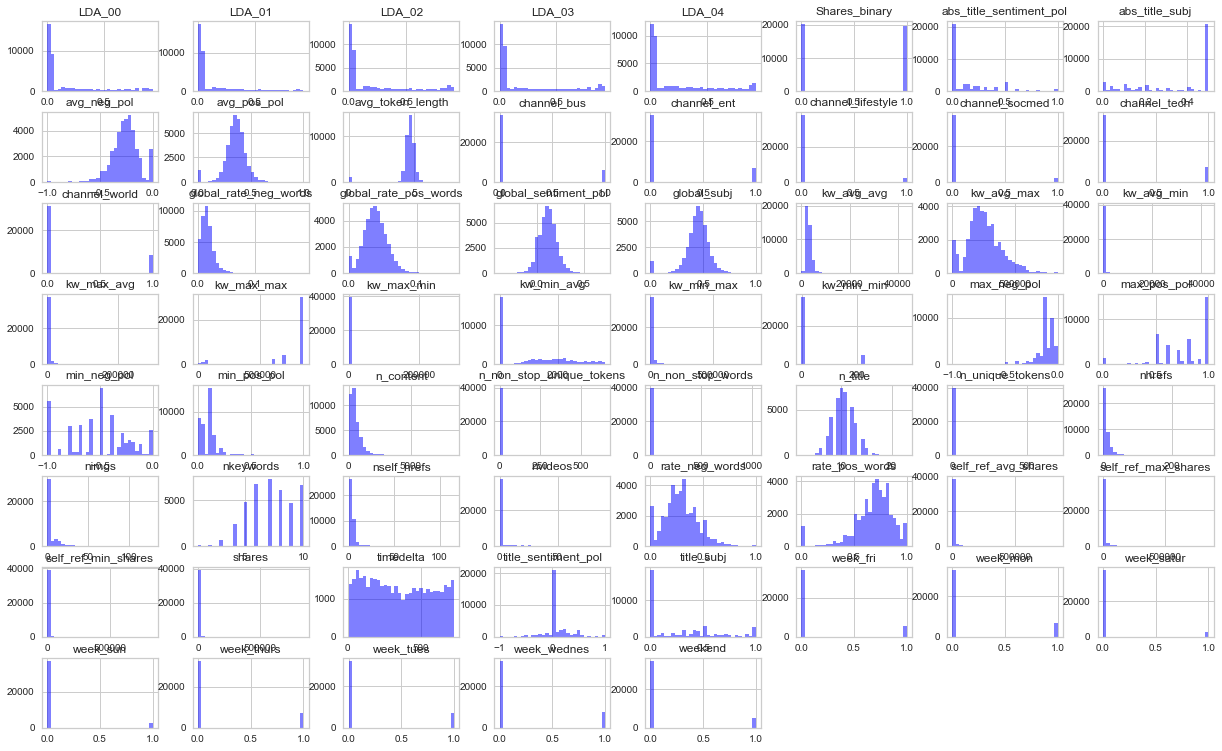

In [8]:

# viewing data histograms
plt.figure(figsize=(20, 10))

df.hist(bins=30, figsize= (21, 13), facecolor="blue", alpha=0.5)
plt.title(r"Histogram for Online News Shares",
    fontsize=15)

plt.show()

In [9]:
#RemovingOutliers
#Finding Median, Q1F, Q3F, Interquartile range

sorted_shares = df.sort_values('shares') 

median = sorted_shares['shares'].median() 

first_quartile = sorted_shares['shares'].quantile(q=0.25) 

third_quartile = sorted_shares['shares'].quantile(q=0.75) 

interquartile_range = third_quartile-first_quartile

In [10]:
#inner-fences(minor outlier) and outer-fences(major outlier)
inner_boundary1 = first_quartile-(interquartile_range*1.5) #-1835.0 

inner_boundary2 = third_quartile+(interquartile_range*1.5) #5581.0 

outer_boundary1 = first_quartile-(interquartile_range*3)   #-4616.0 

outer_boundary2 = third_quartile+(interquartile_range*3)   #8362.0

print(inner_boundary1,inner_boundary2,outer_boundary1,outer_boundary2)

-1835.0 5581.0 -4616.0 8362.0


In [11]:
#Removing the outliers 

df_no_outliers = df[df["shares"]<=8362] 

mean = df_no_outliers['shares'].mean() #Without outlier treatment, mean was 3395. Removing outliers, we get 1916
mean

1916.4932888635808

In [12]:
Df = df[df['shares']<=outer_boundary2]

In [13]:
print(f'Data before Removing Outliers = {df.shape}')
print(f'Data after Removing Outliers = {Df.shape}')
print(f'Number of Outliers = {df.shape[0] - Df.shape[0]}')

Data before Removing Outliers = (39644, 61)
Data after Removing Outliers = (36879, 61)
Number of Outliers = 2765


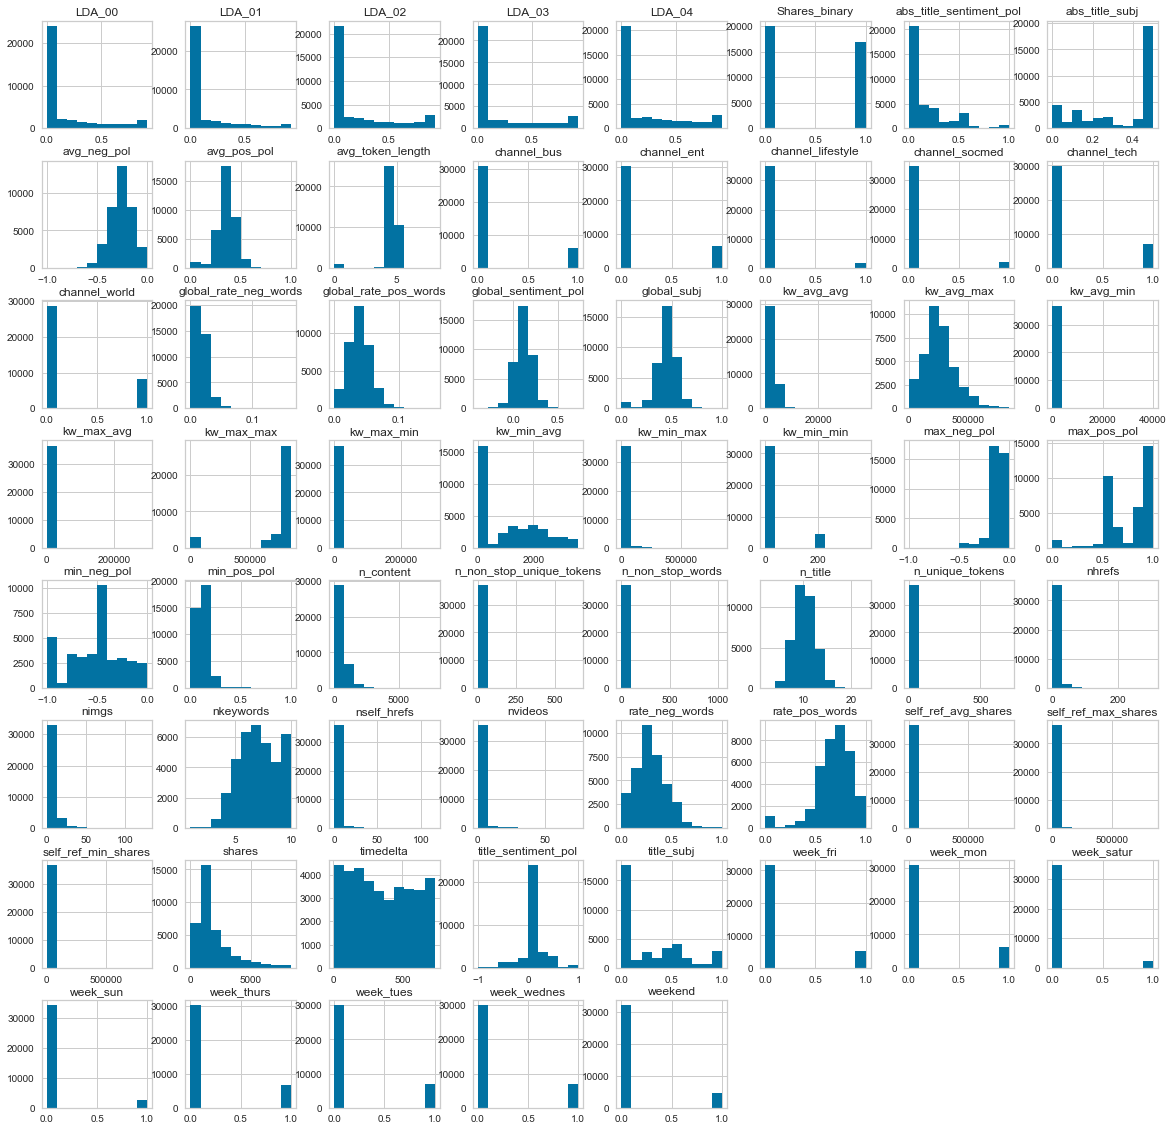

In [14]:
Df.hist(figsize=(20,20))
plt.show()

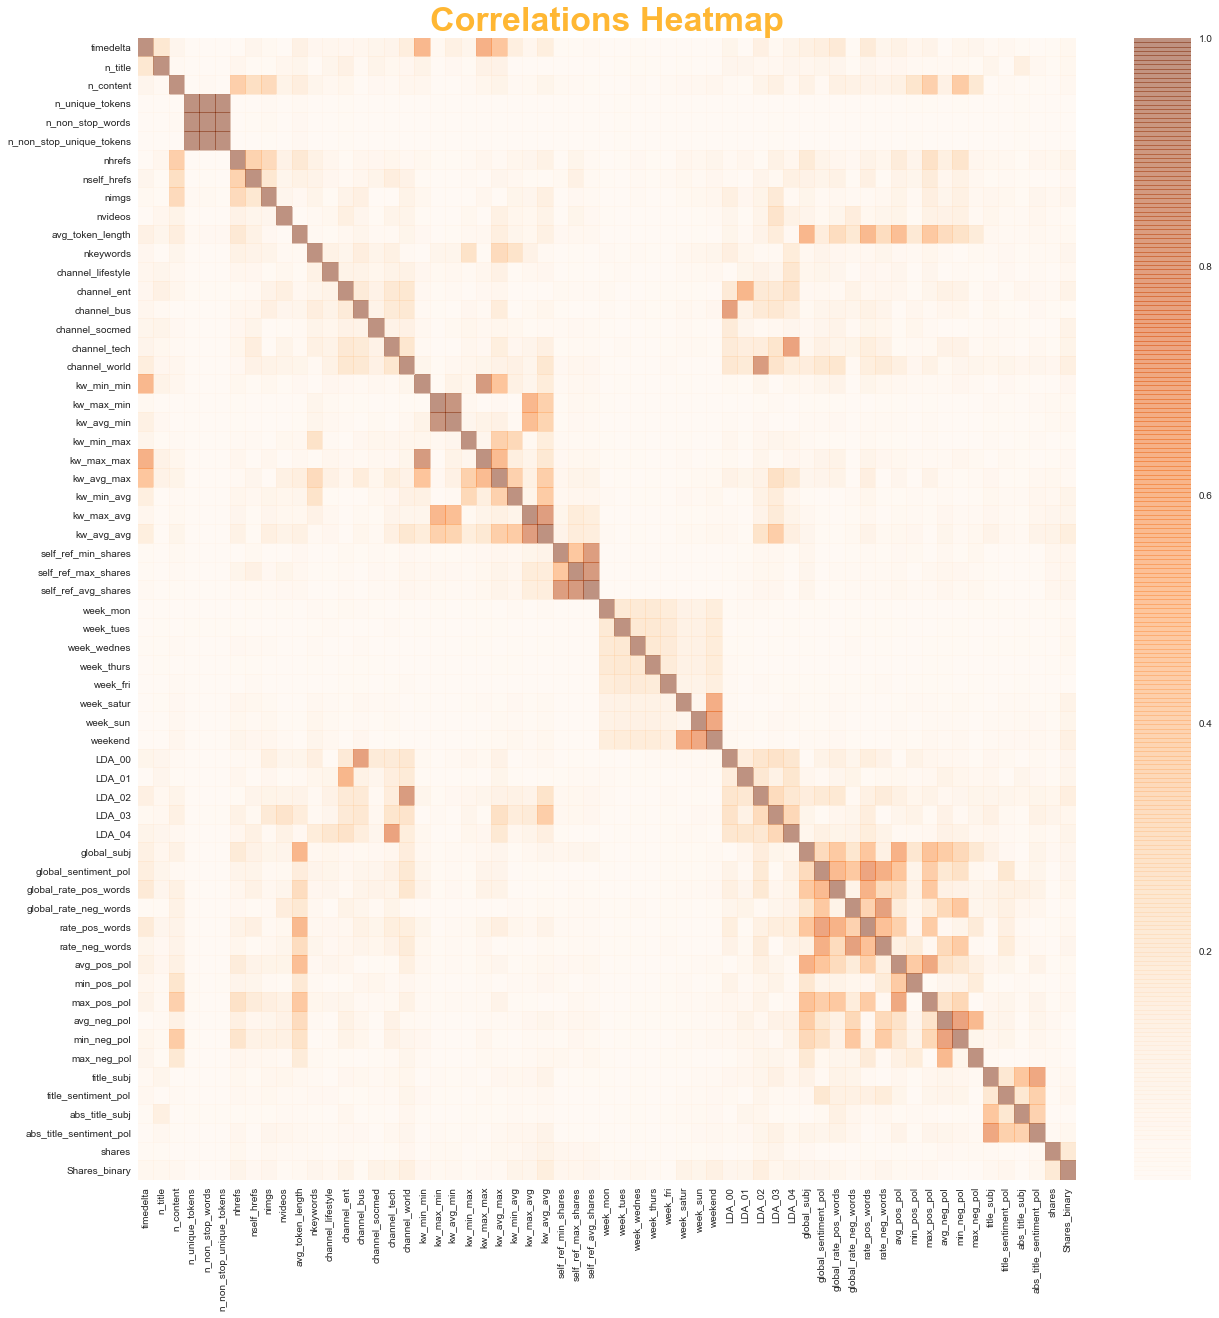

In [15]:
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
plt.figure(figsize=(21, 21))
plt.title('Correlations Heatmap',
          fontdict={'fontsize': 34,
                    'color':  'orange',
                    'fontweight':  'bold'},
          alpha=.8)

sns.heatmap(corr.abs(),
            cmap="Oranges", alpha=.5,
            xticklabels=corr.columns,
            yticklabels=corr.columns
            )

plt.show()

In [16]:
#building target variable
# creating column (value = 1 for rows where `shares` is at least 1500)
df['Shares_binary'] = np.where(df['shares']>=1500, '1', '0').astype('int64')
df.Shares_binary.dtype

dtype('int64')

In [17]:
# viewing the first 10 rows
df[['shares', 'Shares_binary']].head(10)


,shares,Shares_binary
url,,
http://mashable.com/2013/01/07/amazon-instant-video-browser/,593,0
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,711,0
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,1500,1
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,1200,0
http://mashable.com/2013/01/07/att-u-verse-apps/,505,0
http://mashable.com/2013/01/07/beewi-smart-toys/,855,0
http://mashable.com/2013/01/07/bodymedia-armbandgets-update/,556,0
http://mashable.com/2013/01/07/canon-poweshot-n/,891,0
http://mashable.com/2013/01/07/car-of-the-future-infographic/,3600,1


In [19]:
# saving the current - state dataframe to a csv file
df.to_csv(r"C:\Users\Dev\Downloads\Complete-Python-3-Bootcamp-master/OnlineNewsPopularity.csv", header=True, index=True)

In [20]:
# setting to view all columns
pd.set_option('display.max_columns', 999)

# opening saved data from .csv file
df_2 = pd.read_csv(r"C:\Users\Dev\Downloads\Complete-Python-3-Bootcamp-master/OnlineNewsPopularity.csv",
                   index_col=0)

display(df_2.shape)
df_2.head()

(39644, 61)

,timedelta,n_title,n_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,nhrefs,nself_hrefs,nimgs,nvideos,avg_token_length,nkeywords,channel_lifestyle,channel_ent,channel_bus,channel_socmed,channel_tech,channel_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_ref_min_shares,self_ref_max_shares,self_ref_avg_shares,week_mon,week_tues,week_wednes,week_thurs,week_fri,week_satur,week_sun,weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subj,global_sentiment_pol,global_rate_pos_words,global_rate_neg_words,rate_pos_words,rate_neg_words,avg_pos_pol,min_pos_pol,max_pos_pol,avg_neg_pol,min_neg_pol,max_neg_pol,title_subj,title_sentiment_pol,abs_title_subj,abs_title_sentiment_pol,shares,Shares_binary
url,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
http://mashable.com/2013/01/07/amazon-instant-video-browser/,731,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,5,0,1,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1,0,0,0,0,0,0,0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,4,0,0,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,0,0,0,0,0,0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,731,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,6,0,0,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1,0,0,0,0,0,0,0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,731,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,7,0,1,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,0,0,0,0,0,0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,7,0,0,0,0,1,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1,0,0,0,0,0,0,0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0


In [21]:
#Helping Index for referrings
for i in range(len(Df.columns)):
    print(f'{i} -> {Df.columns[i]}')

0 -> timedelta
1 -> n_title
2 -> n_content
3 -> n_unique_tokens
4 -> n_non_stop_words
5 -> n_non_stop_unique_tokens
6 -> nhrefs
7 -> nself_hrefs
8 -> nimgs
9 -> nvideos
10 -> avg_token_length
11 -> nkeywords
12 -> channel_lifestyle
13 -> channel_ent
14 -> channel_bus
15 -> channel_socmed
16 -> channel_tech
17 -> channel_world
18 -> kw_min_min
19 -> kw_max_min
20 -> kw_avg_min
21 -> kw_min_max
22 -> kw_max_max
23 -> kw_avg_max
24 -> kw_min_avg
25 -> kw_max_avg
26 -> kw_avg_avg
27 -> self_ref_min_shares
28 -> self_ref_max_shares
29 -> self_ref_avg_shares
30 -> week_mon
31 -> week_tues
32 -> week_wednes
33 -> week_thurs
34 -> week_fri
35 -> week_satur
36 -> week_sun
37 -> weekend
38 -> LDA_00
39 -> LDA_01
40 -> LDA_02
41 -> LDA_03
42 -> LDA_04
43 -> global_subj
44 -> global_sentiment_pol
45 -> global_rate_pos_words
46 -> global_rate_neg_words
47 -> rate_pos_words
48 -> rate_neg_words
49 -> avg_pos_pol
50 -> min_pos_pol
51 -> max_pos_pol
52 -> avg_neg_pol
53 -> min_neg_pol
54 -> max_neg_po

In [22]:
#EDA
a,b = Df['shares'].mean(),Df['shares'].median()

In [23]:
print(f'Mean article shares = {a}')
print(f'Median article share = {b}')

Mean article shares = 1916.4932888635808
Median article share = 1300.0


In [24]:
Wd = Df.columns.values[30:37]
Wd

array(['week_mon', 'week_tues', 'week_wednes', 'week_thurs', 'week_fri',
       'week_satur', 'week_sun'], dtype=object)

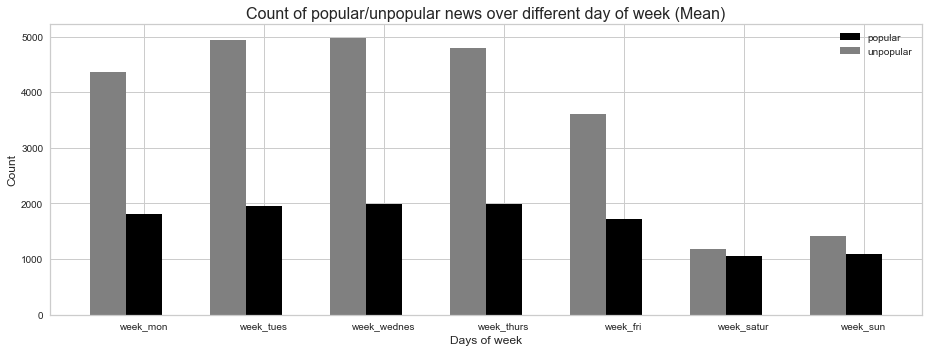

In [25]:
Unpop=Df[Df['shares']<a]
Pop=Df[Df['shares']>=a]
Unpop_day = Unpop[Wd].sum().values
Pop_day = Pop[Wd].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Mean)", fontsize = 16)
plt.bar(np.arange(len(Wd)), Pop_day, width = 0.3, align="center", color = 'black', \
          label = "popular")
plt.bar(np.arange(len(Wd)) - 0.3, Unpop_day, width = 0.3, align = "center", color = 'grey', \
          label = "unpopular")
plt.xticks(np.arange(len(Wd)), Wd)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

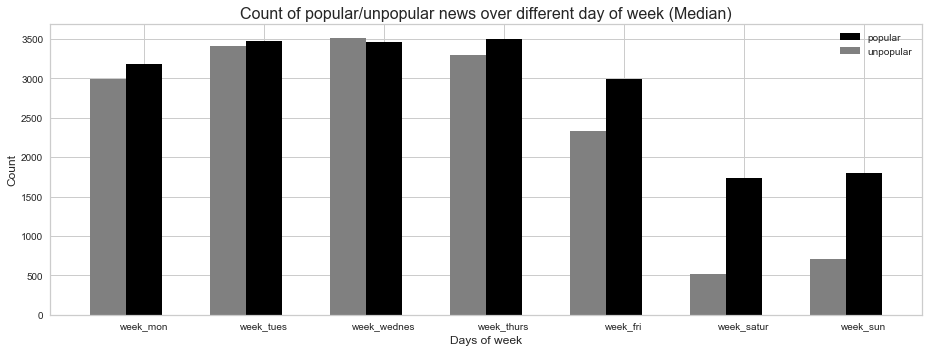

In [26]:
Unpop2=Df[Df['shares']<b]
Pop2=Df[Df['shares']>=b]
Unpop_day2 = Unpop2[Wd].sum().values
Pop_day2 = Pop2[Wd].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Median)", fontsize = 16)
plt.bar(np.arange(len(Wd)), Pop_day2, width = 0.3, align="center", color = 'black', \
          label = "popular")
plt.bar(np.arange(len(Wd)) - 0.3, Unpop_day2, width = 0.3, align = "center", color = 'grey', \
          label = "unpopular")
plt.xticks(np.arange(len(Wd)), Wd)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [27]:
Dc = Df.columns.values[12:18]

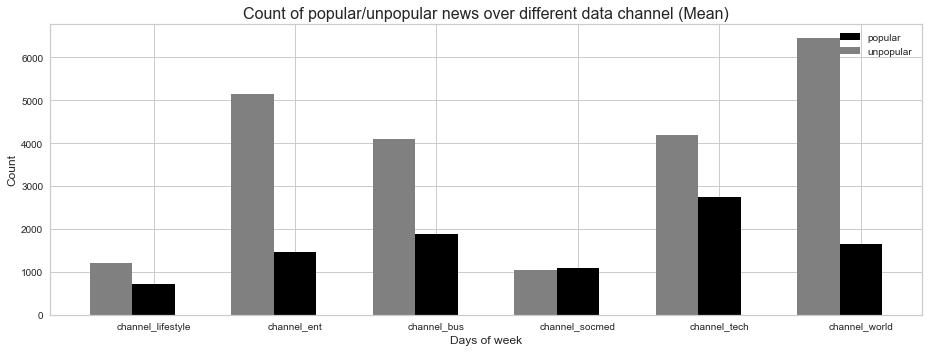

In [28]:
Unpop3=Df[Df['shares']<a]
Pop3=Df[Df['shares']>=a]
Unpop_day3 = Unpop3[Dc].sum().values
Pop_day3 = Pop3[Dc].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different data channel (Mean)", fontsize = 16)
plt.bar(np.arange(len(Dc)), Pop_day3, width = 0.3, align="center", color = 'black', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day3, width = 0.3, align = "center", color = 'grey', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [29]:

# viewing most and least shared articles
pd.set_option('min_rows', 20)
df_2.shares.sort_values(ascending=False)

url
http://mashable.com/2013/07/03/low-cost-iphone/                                    843300
http://mashable.com/2013/04/15/dove-ad-beauty-sketches/                            690400
http://mashable.com/2014/04/09/first-100-gilt-soundcloud-stitchfix/                663600
http://mashable.com/2013/11/18/kanye-west-harvard-lecture/                         652900
http://mashable.com/2013/03/02/wealth-inequality/                                  617900
http://mashable.com/2013/11/12/roomba-880-review/                                  441000
http://mashable.com/2014/01/14/australia-heatwave-photos/                          310800
http://mashable.com/2013/03/28/blackberry-1-million/                               306100
http://mashable.com/2013/11/14/ibm-watson-brief/                                   298400
http://mashable.com/2014/10/22/ebola-cdc-active-monitoring/                        284700
                                                                                    ...  
http:/

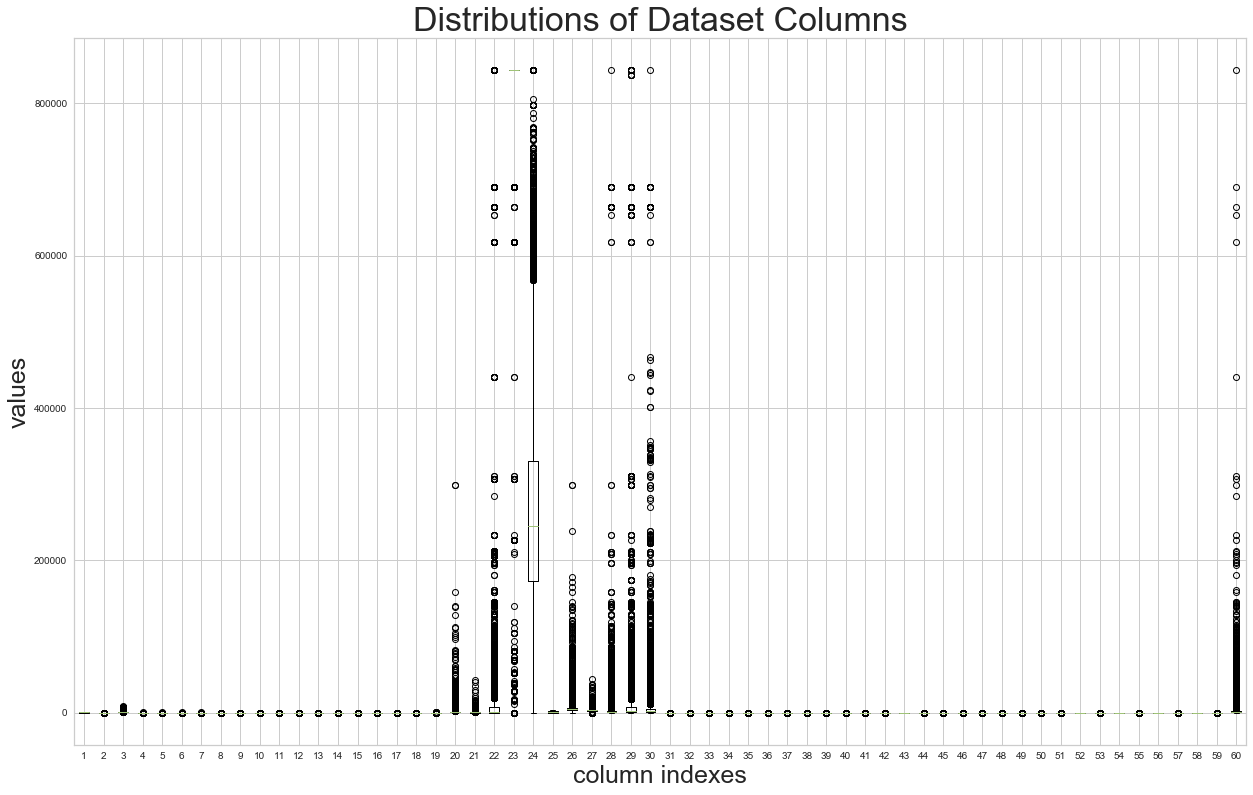

In [30]:
# viewing column box plots
plt.figure(figsize=(21, 13))
plt.boxplot([df_2[col] for col in df_2.iloc[:, 0:60].columns])

plt.title("Distributions of Dataset Columns",
          fontdict={'fontsize': 34})
plt.xlabel('column indexes', fontsize=25)
plt.ylabel('values', fontsize=25)


plt.show()

In [31]:
# spliting the dataframe outcome and predictor variables
X = df_2.drop(['shares', 'Shares_binary'], axis=1)  # features
y = df_2['Shares_binary']  # target

# splitting the dataset into 75/25 training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=0
                                                    )

In [32]:
warnings.filterwarnings("ignore")

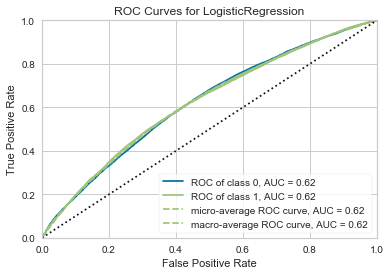

In [33]:
visualizer = roc_auc(LogisticRegression(), X, y)

In [34]:
# instantiate and fit a Decision Tree classifier
tree_clf = DecisionTreeClassifier(criterion='gini',
                                  max_depth=5,
                                  random_state=0)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [35]:
# viewing test set predictions
pred = tree_clf.predict(X_test)

# viewing confusion matrix and classification report
print("\n", confusion_matrix(y_test, pred), "\n")
print(classification_report(y_test, pred))


 [[3237 1836]
 [1795 3043]] 

              precision    recall  f1-score   support

           0       0.64      0.64      0.64      5073
           1       0.62      0.63      0.63      4838

    accuracy                           0.63      9911
   macro avg       0.63      0.63      0.63      9911
weighted avg       0.63      0.63      0.63      9911



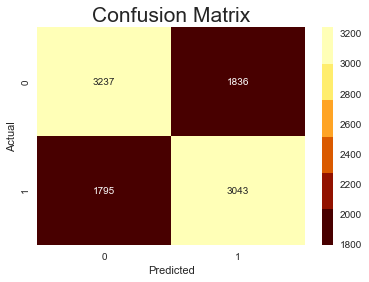

In [37]:
# plotting confusion matrix heatmap
cm = confusion_matrix(y_test, pred)

sns.heatmap(cm, cmap=sns.color_palette('afmhot'), annot=True, fmt='0.4g')

plt.autoscale()

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix", fontdict={'fontsize': 21})

# plt.savefig('images/dtree-cm-heatmap.png', transparent=False)

plt.show()

In [38]:
# checking feature importances of the trained model
tree_clf.feature_importances_

array([0.06668088, 0.        , 0.        , 0.03397857, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00576391, 0.10550961, 0.        ,
       0.07508385, 0.09589684, 0.01117742, 0.        , 0.        ,
       0.00409296, 0.        , 0.        , 0.        , 0.        ,
       0.01493452, 0.3258526 , 0.11303927, 0.        , 0.00380801,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.09888608, 0.00688671, 0.00954792,
       0.01868913, 0.        , 0.        , 0.        , 0.        ,
       0.00324808, 0.        , 0.00232904, 0.        , 0.00270122,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00189338])

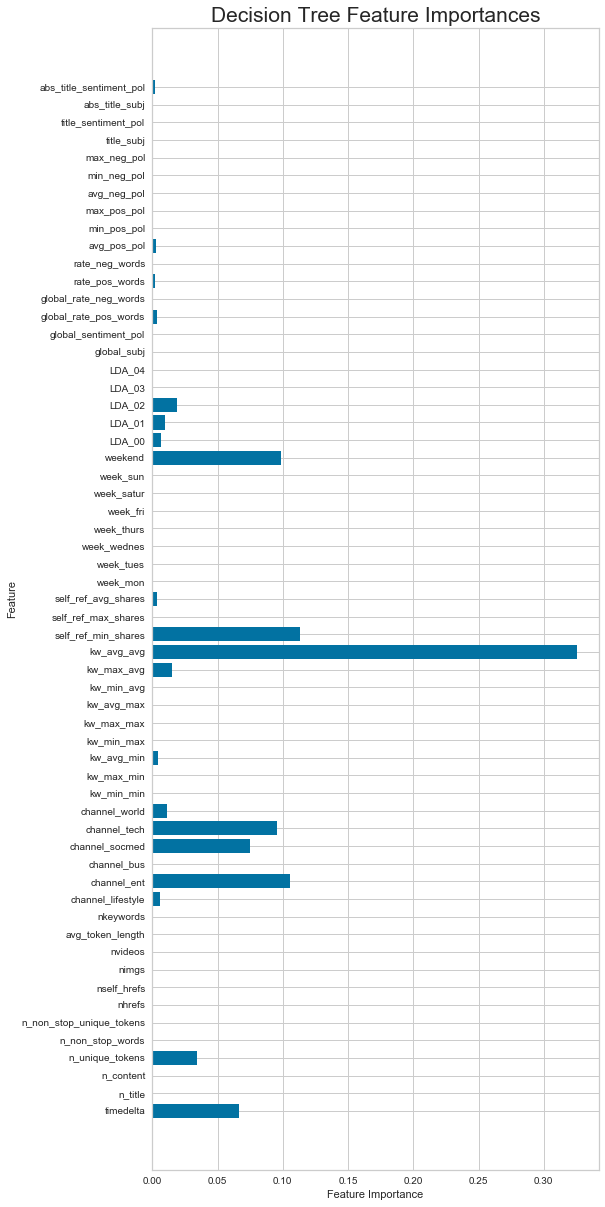

In [39]:
# visualizing Decision Tree feature importances
def plot_feature_importances(model, heading):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8, 21))
    plt.title(heading, fontdict={'fontsize': 21})
    plt.barh(range(n_features),
             model.feature_importances_,
             align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')


plot_feature_importances(tree_clf, "Decision Tree Feature Importances")

In [40]:
# building a Random Forest classifier pipeline
rf_pipeline = Pipeline([('ss', StandardScaler()),
                        ('RF', RandomForestClassifier(random_state=0))])

# defining the grid
grid = [{'RF__max_depth': [2, 4, 6],
         'RF__min_samples_split': [2, 5, 10],
         'RF__min_samples_leaf': [1, 3, 5]}]

# defining a grid search with the estimator
# using `refit`, to update the model with optimized hyperparameters
rf_gridsearch = GridSearchCV(estimator=rf_pipeline,
                             param_grid=grid,
                             scoring='accuracy',
                             cv=5,
                             refit=True,
                             n_jobs=-1,
                             verbose=1)

# fitting the training data
rf_gridsearch.fit(X_train, y_train)

# viewing accuracy on the test set
pred = rf_gridsearch.predict(X_test)
print(f"Optimal Parameters: {rf_gridsearch.best_params_}")
print("")
print("rf_gridsearch score: ",
      rf_gridsearch.score(X_test, y_test).round(2))
print("")
print(classification_report(y_test, pred))

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  1.3min finished


Optimal Parameters: {'RF__max_depth': 6, 'RF__min_samples_leaf': 3, 'RF__min_samples_split': 2}

rf_gridsearch score:  0.65

              precision    recall  f1-score   support

           0       0.66      0.66      0.66      5073
           1       0.64      0.65      0.65      4838

    accuracy                           0.65      9911
   macro avg       0.65      0.65      0.65      9911
weighted avg       0.65      0.65      0.65      9911



In [41]:
# instantiate a variable for the optimized Random Forest model
rf_model = rf_gridsearch.best_estimator_.steps[1][1]

# viewing the full model and hyperperameters
rf_model


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

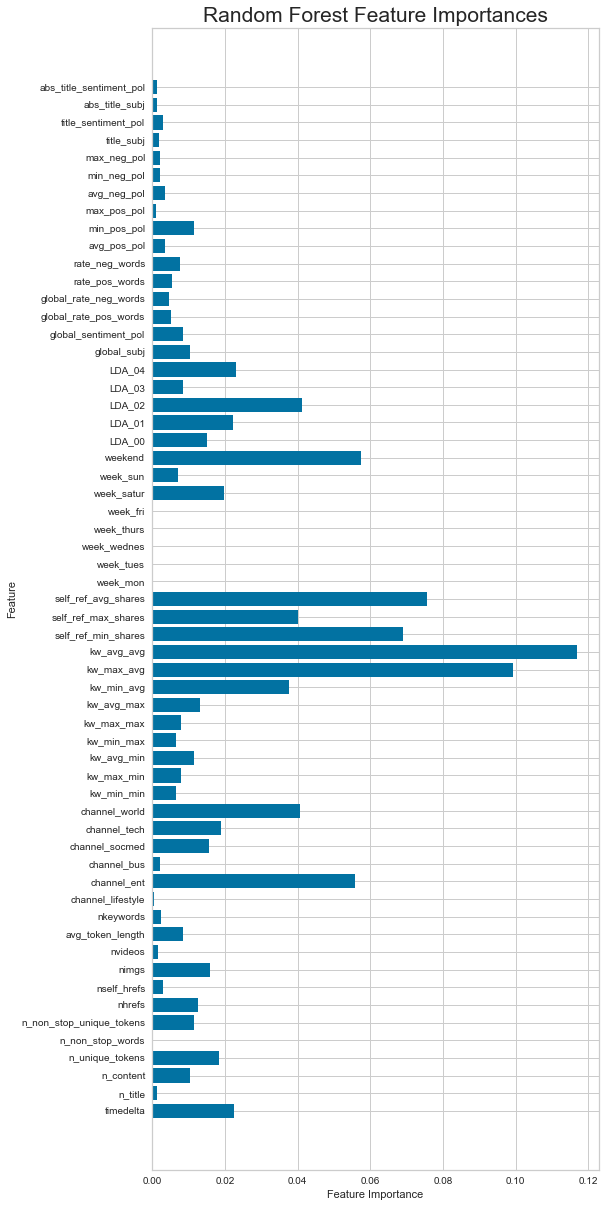

In [42]:

# visualizing Random Forest feature importances
plot_feature_importances(rf_model, "Random Forest Feature Importances")